# Advent of Code 2018
___

[**Day 1**](#day1) &nbsp; &nbsp; &nbsp; [**Day 2**](#day2) &nbsp; &nbsp; &nbsp; [**Day 3**](#day3) &nbsp; &nbsp; &nbsp; [Day 4](#day4) &nbsp; &nbsp; &nbsp; [Day 5](#day5)

[Day 6](#day6) &nbsp; &nbsp; &nbsp; [Day 7](#day7) &nbsp; &nbsp; &nbsp; [Day 8](#day8) &nbsp; &nbsp; &nbsp; [Day 9](#day9) &nbsp; &nbsp; &nbsp; [Day 10](#day10)

[Day 11](#day11) &nbsp; &nbsp; [Day 12](#day12) &nbsp; &nbsp; [Day 13](#day13) &nbsp; &nbsp; [Day 14](#day14) &nbsp; &nbsp; [Day 15](#day15)

[Day 16](#day16) &nbsp; &nbsp; [Day 17](#day17) &nbsp; &nbsp; [Day 18](#day18) &nbsp; &nbsp; [Day 19](#day19) &nbsp; &nbsp; [Day 20](#day20)

[Day 21](#day21) &nbsp; &nbsp; [Day 22](#day22) &nbsp; &nbsp; [Day 23](#day23) &nbsp; &nbsp; [Day 24](#day24) &nbsp; &nbsp; [Day 25](#day25)

___

<a class="anchor" id="day1"></a>
# Day 1

*Part 1*  
Given a list of changes in frequency, find the total change in frequency.

*Part 2*  
Repeatedly loop through the changes in frequency list to find the first frequency that is observed twice.

In [1]:
with open('data2018/day1.txt') as f1:
    freq_changes = [row.strip() for row in f1.readlines()]
    
freq_changes[-3:]

['+31', '+12', '+117267']

**Part 1**

In [2]:
freq = sum([int(fc) for fc in freq_changes])
freq

427

**Part 2**

<mark> Super slow! </mark>

In [3]:
freq = 0
freq_list = [0]
i = 0
n = len(freq_changes)

while True:
    if i % 25000 == 0:
        print(i)
    freq += int(freq_changes[i % n])
    if freq in freq_list:
        print(f'repeat: {freq}')
        break
    else:
        freq_list.append(freq)
    i += 1

0
25000
50000
75000
100000
125000
repeat: 341


<a class="anchor" id="day2"></a>

# Day 2

*Part 1*  
Find the checksum for the list of IDs by finding the number of IDs that have exactly two of any character times the number of IDs that have exactly three of any character.

*Part 2*  
Now, we want to find the two IDs that differ by only a single character in a single position.  Determine the characters that are in common between these two IDs (in order).

In [4]:
with open('data2018/day2.txt') as f2:
    IDs = [row.strip() for row in f2.readlines()]
    
IDs[-3:]

['lujnogkvetprmxhdydcqvzixaw',
 'lujnogkbetpimsrdwfcqvzixaw',
 'lujnomboetprmshdyfcqvzixaw']

**Part 1**

In [5]:
twos = 0
threes = 0
for ID in IDs:
    counts = [(ID.count(char), char) for char in list(set(ID))]
    twocounts = [count for count in counts if count[0] == 2]
    threecounts = [count for count in counts if count[0] == 3]
    twos += 1 if len(twocounts) > 0 else 0
    threes += 1 if len(threecounts) > 0 else 0
twos*threes

9633

**Part 2**

In [6]:
for i, IDx in enumerate(IDs):
    for j, IDy in enumerate(IDs[i:]):
        matches = [IDx[k] == IDy[k] for k in range(len(IDx))]
        if sum(matches) == (len(IDx) - 1):
            match = ''.join([IDx[k] for k in range(len(IDx)) if IDx[k] == IDy[k]])
            print(f'{match = }')
            

match = 'lujnogabetpmsydyfcovzixaw'


<a class="anchor" id="day3"></a>
# Day 3

*Part 1*  
Patches are applied to a fabric sheet.  Find how many square inches on the sheet are covered by two or more patches.

*Part 2*  
There is only one patch that does not have any overlap with another patch, find its ID.

In [7]:
with open('data2018/day3.txt') as f3:
    claims = [row.strip() for row in f3.readlines()]

claims[-3:]

['#1333 @ 695,587: 18x16', '#1334 @ 435,778: 25x13', '#1335 @ 562,221: 12x16']

**Part 1**

In [8]:
import numpy as np
fabric = np.zeros((1000, 1000))

for claim in claims:
    parts = claim.split()
    corner, dims = parts[2:]
    x, y = [int(val) for val in corner[:-1].split(',')]
    width, height = [int(dim) for dim in dims.split('x')]
    fabric[y:y+height, x:x+width] += 1
    
sum(sum(fabric > 1))

110383

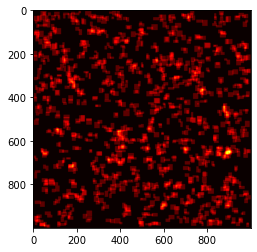

In [9]:
import matplotlib.pyplot as plt
plt.imshow(fabric, cmap='hot')
plt.show()

**Part 2**

In [10]:
# Be sure to run Part 1 first to get the "fabric" variable with all the patches on it
# Here we're using the completed fabrid from Part 1 and re-looping through all 
#  claims to see if any of them have only 1s (sum of claim rect == w x h)

for claim in claims:
    parts = claim.split()
    corner, dims = parts[2:]
    x, y = [int(val) for val in corner[:-1].split(',')]
    width, height = [int(dim) for dim in dims.split('x')]
    if sum(sum(fabric[y:y+height, x:x+width])) == width*height:
        print(parts[0])
        break
        

#129


<a class="anchor" id="day4"></a>

# Day 4

*Part 1*  
Find the guard that has the most minutes asleep. What minute does that guard spend asleep the most?

*Part 2*  


In [11]:
with open('data2018/day4.txt') as f4:
    records = [row.strip() for row in f4.readlines()]
    
records[-3:], records[:3]

(['[1518-09-15 00:52] falls asleep',
  '[1518-08-09 00:47] falls asleep',
  '[1518-10-23 00:24] falls asleep'],
 ['[1518-05-11 00:22] falls asleep',
  '[1518-10-11 00:51] wakes up',
  '[1518-10-12 00:31] wakes up'])

In [12]:
# sample = '''[1518-11-01 00:00] Guard #10 begins shift
# [1518-11-01 00:05] falls asleep
# [1518-11-01 00:25] wakes up
# [1518-11-01 00:30] falls asleep
# [1518-11-01 00:55] wakes up
# [1518-11-01 23:58] Guard #99 begins shift
# [1518-11-02 00:40] falls asleep
# [1518-11-02 00:50] wakes up
# [1518-11-03 00:05] Guard #10 begins shift
# [1518-11-03 00:24] falls asleep
# [1518-11-03 00:29] wakes up
# [1518-11-04 00:02] Guard #99 begins shift
# [1518-11-04 00:36] falls asleep
# [1518-11-04 00:46] wakes up
# [1518-11-05 00:03] Guard #99 begins shift
# [1518-11-05 00:45] falls asleep
# [1518-11-05 00:55] wakes up'''

# records = [row.strip() for row in sample.split('\n')]
# records

In [13]:
sorted_recs = []
for rec in records:
    words = rec.split()
    date, hrmin = words[:2]
    date = [int(x) for x in date[1:].split('-')]
    minute = int(hrmin.split(':')[1][:-1])
    new_rec = [(date[0], date[1], date[2], minute)] + words[2:]
    sorted_recs.append(new_rec)

sorted_recs.sort(key=lambda x: x[0])
sorted_recs[:50]

[[(1518, 3, 4, 4), 'Guard', '#1307', 'begins', 'shift'],
 [(1518, 3, 4, 8), 'falls', 'asleep'],
 [(1518, 3, 4, 35), 'wakes', 'up'],
 [(1518, 3, 4, 54), 'falls', 'asleep'],
 [(1518, 3, 4, 59), 'wakes', 'up'],
 [(1518, 3, 5, 3), 'Guard', '#691', 'begins', 'shift'],
 [(1518, 3, 5, 25), 'falls', 'asleep'],
 [(1518, 3, 5, 30), 'wakes', 'up'],
 [(1518, 3, 5, 47), 'falls', 'asleep'],
 [(1518, 3, 5, 55), 'wakes', 'up'],
 [(1518, 3, 5, 59), 'Guard', '#1307', 'begins', 'shift'],
 [(1518, 3, 6, 53), 'falls', 'asleep'],
 [(1518, 3, 6, 59), 'wakes', 'up'],
 [(1518, 3, 7, 0), 'Guard', '#2399', 'begins', 'shift'],
 [(1518, 3, 7, 15), 'falls', 'asleep'],
 [(1518, 3, 7, 24), 'wakes', 'up'],
 [(1518, 3, 7, 39), 'falls', 'asleep'],
 [(1518, 3, 7, 47), 'wakes', 'up'],
 [(1518, 3, 8, 2), 'Guard', '#2851', 'begins', 'shift'],
 [(1518, 3, 8, 17), 'falls', 'asleep'],
 [(1518, 3, 8, 20), 'wakes', 'up'],
 [(1518, 3, 8, 35), 'falls', 'asleep'],
 [(1518, 3, 8, 36), 'wakes', 'up'],
 [(1518, 3, 8, 42), 'falls', 'as

This is the weird thing:

    [(1518, 3, 8, 42), 'falls', 'asleep'],
    [(1518, 3, 8, 50), 'Guard', '#1051', 'begins', 'shift'],
    [(1518, 3, 8, 54), 'wakes', 'up'],
    
So what I think is happening is that the previous guard falls asleep, the next guard starts shift sleeping, then wakes up at second 54. This would give sleep times of 42-49 for the previous guard and 50-53 for the next guard.

In [14]:
guard = 0
guards = dict()

for i, rec in enumerate(sorted_recs):
    time, word = rec[:2]
    
    if word == 'Guard':
        if (i != 0) and sorted_recs[i-1][1] == 'falls':
            guards.setdefault(guard, [])
            guards[guard] += list(range(time[-1] - sorted_recs[i-1][0][-1]))
        guard = int(rec[2][1:])
    
    elif word == 'falls':
        continue
        
    elif word == 'wakes':
        guards.setdefault(guard, [])
        print(sorted_recs[i-1])
        print(rec)
        print(time[-1], sorted_recs[i-1][0][-1], time[-1] - sorted_recs[i-1][0][-1])
        guards[guard] += list(range(time[-1] - sorted_recs[i-1][0][-1]))
        
len(guards[1307])

[(1518, 3, 4, 8), 'falls', 'asleep']
[(1518, 3, 4, 35), 'wakes', 'up']
35 8 27
[(1518, 3, 4, 54), 'falls', 'asleep']
[(1518, 3, 4, 59), 'wakes', 'up']
59 54 5
[(1518, 3, 5, 25), 'falls', 'asleep']
[(1518, 3, 5, 30), 'wakes', 'up']
30 25 5
[(1518, 3, 5, 47), 'falls', 'asleep']
[(1518, 3, 5, 55), 'wakes', 'up']
55 47 8
[(1518, 3, 6, 53), 'falls', 'asleep']
[(1518, 3, 6, 59), 'wakes', 'up']
59 53 6
[(1518, 3, 7, 15), 'falls', 'asleep']
[(1518, 3, 7, 24), 'wakes', 'up']
24 15 9
[(1518, 3, 7, 39), 'falls', 'asleep']
[(1518, 3, 7, 47), 'wakes', 'up']
47 39 8
[(1518, 3, 8, 17), 'falls', 'asleep']
[(1518, 3, 8, 20), 'wakes', 'up']
20 17 3
[(1518, 3, 8, 35), 'falls', 'asleep']
[(1518, 3, 8, 36), 'wakes', 'up']
36 35 1
[(1518, 3, 8, 50), 'Guard', '#1051', 'begins', 'shift']
[(1518, 3, 8, 54), 'wakes', 'up']
54 50 4
[(1518, 3, 9, 3), 'falls', 'asleep']
[(1518, 3, 9, 34), 'wakes', 'up']
34 3 31
[(1518, 3, 9, 37), 'falls', 'asleep']
[(1518, 3, 9, 55), 'wakes', 'up']
55 37 18
[(1518, 3, 10, 12), 'fa

363

In [15]:
sleep_times = {k: len(v) for k, v in guards.items()}
sleep_times

{1307: 363,
 691: 273,
 2399: 468,
 2851: 410,
 1051: 344,
 2267: 461,
 349: 192,
 1601: 490,
 2153: 327,
 2447: 302,
 2333: 194,
 1117: 138,
 509: 246,
 1091: 250,
 163: 454,
 353: 360,
 269: 222,
 3203: 320,
 3559: 204,
 2617: 161}

In [16]:
# find guard that slept the most
sleepiest_guard = max(sleep_times, key=sleep_times.get)
sleepiest_guard

1601

In [17]:
# find which minute he slept the most on
minutes = guards[sleepiest_guard]
minute_counts = [(minutes.count(t), t) for t in list(set(minutes))]
sorted(minute_counts)[::-1]

[(33, 0),
 (31, 1),
 (28, 2),
 (27, 3),
 (26, 4),
 (25, 5),
 (24, 6),
 (23, 7),
 (21, 9),
 (21, 8),
 (17, 10),
 (16, 12),
 (16, 11),
 (13, 14),
 (13, 13),
 (12, 15),
 (11, 19),
 (11, 18),
 (11, 17),
 (11, 16),
 (9, 24),
 (9, 23),
 (9, 22),
 (9, 21),
 (9, 20),
 (8, 25),
 (5, 32),
 (5, 31),
 (5, 30),
 (5, 29),
 (5, 28),
 (5, 27),
 (5, 26),
 (4, 34),
 (4, 33),
 (2, 36),
 (2, 35)]

<a class="anchor" id="day5"></a>

# Day 5

<a class="anchor" id="day6"></a>

# Day 6

<a class="anchor" id="day7"></a>

# Day 7

<a class="anchor" id="day8"></a>

# Day 8

<a class="anchor" id="day9"></a>

# Day 9

<a class="anchor" id="day10"></a>

# Day 10

<a class="anchor" id="day11"></a>

# Day 11

<a class="anchor" id="day12"></a>

# Day 12

<a class="anchor" id="day13"></a>

# Day 13

<a class="anchor" id="day14"></a>

# Day 14

<a class="anchor" id="day15"></a>

# Day 15

<a class="anchor" id="day16"></a>

# Day 16

<a class="anchor" id="day17"></a>

# Day 17

<a class="anchor" id="day18"></a>

# Day 18

<a class="anchor" id="day19"></a>

# Day 19

<a class="anchor" id="day20"></a>

# Day 20

<a class="anchor" id="day21"></a>

# Day 21

<a class="anchor" id="day22"></a>

# Day 22

<a class="anchor" id="day23"></a>

# Day 23

<a class="anchor" id="day24"></a>

# Day 24

<a class="anchor" id="day25"></a>

# Day 25